#ETHEREUM FRAUD DETECTION 


To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

# Dataset Desciption  
The dataset folder contains the following files:  
transaction_dataset.csv : (9841, 51)

 # Columns Provided in the Dataset

Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

NumberofCreated_Contracts: Total Number of created contract transactions

UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

MinValueReceived: Minimum value in Ether ever received

MaxValueReceived: Maximum value in Ether ever received

AvgValueReceived5Average value in Ether ever received

MinValSent: Minimum value of Ether ever sent

MaxValSent: Maximum value of Ether ever sent

AvgValSent: Average value of Ether ever sent

MinValueSentToContract: Minimum value of Ether sent to a contract

MaxValueSentToContract: Maximum value of Ether sent to a contract

AvgValueSentToContract: Average value of Ether sent to contracts

TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

TotalEtherSent:Total Ether sent for account address

TotalEtherReceived: Total Ether received for account address

TotalEtherSent_Contracts: Total Ether sent to Contract addresses

TotalEtherBalance: Total Ether Balance following enacted transactions

TotalERC20Tnxs: Total number of ERC20 token transfer transactions

ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing Necessary Libraries
# Importing Necessary Libraries
#importing necessary libraries
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
# Read csv file using pandas
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/Etherum Fraud Detection/transaction_dataset.csv")


In [ ]:
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# BASIC EDA

In [ ]:
#check shape of the dataset
data.shape

(9841, 51)

In [ ]:
# check columns of dataset
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [ ]:
#drop Unnamed: 0, Address, Index from dataset
data.drop(["Unnamed: 0", "Address", "Index"], axis = 1, inplace = True)

In [ ]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [ ]:
# check length of dataset
data.shape[0]

9841

In [ ]:
# loop through datatset to find count of unique values of each column
for i in data.columns:
  print("{} : {}".format(i, data[i].nunique()))

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 300
 ERC20 total Ether received : 3460
 ERC20 total ether sent : 1415
 ERC20 total Ether sent contract : 29
 ERC20 uniq sent addr : 107
 ERC20 uniq rec addr : 147
 ERC20 uniq sent addr.1 : 4
 ERC20 uniq rec contract addr : 123
 ERC20 avg time between sent tnx : 1
 ERC20 avg time between rec tnx : 1
 ERC20 avg time between 

In [ ]:
# Check for missing values in all the columnns of the dataset
data.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [ ]:
# Using pandas
data.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,NaN,NaN,NaN,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,NaN,NaN,NaN,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,9.202945e-04,0.002052,-0.000092,0.000149,-0.000070,NaN,NaN,NaN,0.006033,0.030089
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,1.603025e-03,0.003592,-0.001044,-0.000261,-0.000546,NaN,NaN,NaN,0.040674,0.148851
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,3.598439e-03,0.005246,-0.000967,-0.000439,-0.000827,NaN,NaN,NaN,0.084897,0.237520
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-1.670077e-03,-0.002852,-0.001498,-0.001529,-0.001477,NaN,NaN,NaN,-0.028810,-0.002695


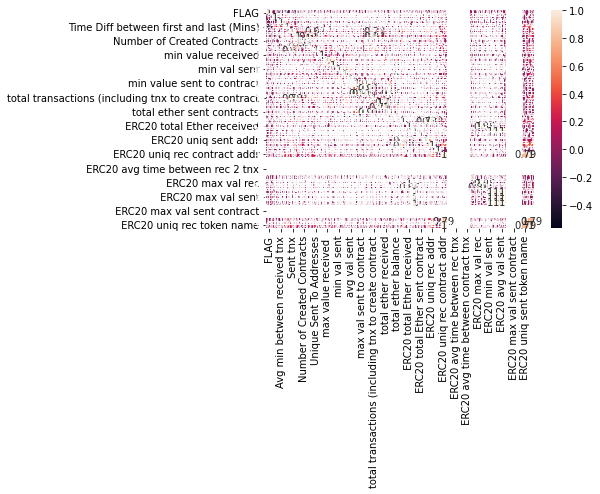

In [ ]:
 #Using seaborn
sns.heatmap(data = data.corr(), annot = True)

# CHECKING IF DATASET IS SKEWED OR NOT

#Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a2289b590>,
      dtype=object)

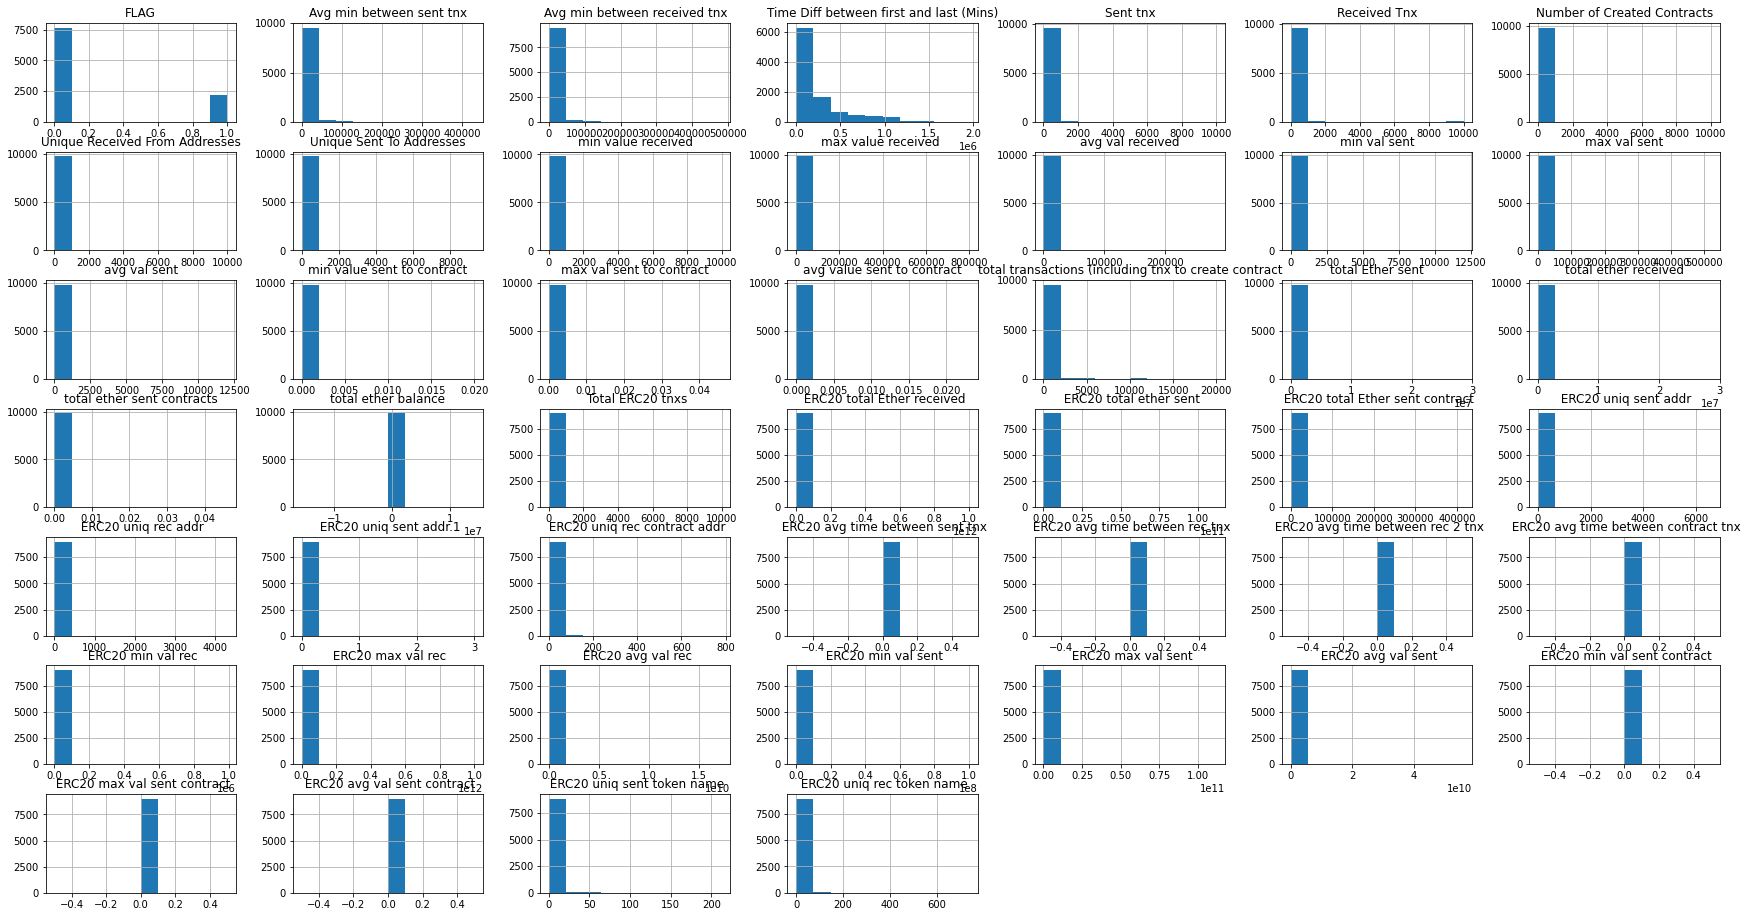

In [ ]:
# Histogram using pandas 
data.hist(figsize = (30, 16))

In [ ]:
# check skewness of dataset
data.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

After checking skewness of dataset and from histogram we can see that the dataset is heavily skewed, with most of the weight being on the left tail.

# CHECKING IF DATASET IS BALANCED OR NOT

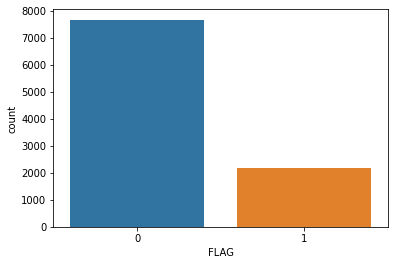

In [ ]:
# count plot of flag column
sns.countplot(data["FLAG"])

In [ ]:
# check total number of fraudulent and non-fraudulent instances
data["FLAG"].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [ ]:
# find Percentage of non-fraudulent instances
int((data["FLAG"].value_counts()[0] / data.shape[0]) * 100)

77

In [ ]:
# find Percentage of fraudulent instances
int((data["FLAG"].value_counts()[1] / data.shape[0]) * 100)

22

The dataset is heavily imbalanced with only 22% of fraudulent instance.

# understanding more about dataset

In [ ]:
# display unique values in categorical columns
# ERC20 most sent token type
# ERC20_most_rec_token_type
display(np.unique(data[" ERC20 most sent token type"].astype(str)))
display(np.unique(data[" ERC20_most_rec_token_type"].astype(str)))

array(['\x01', ' ', '$7RIP$', "''", '0', '0xBitcoin Token',
       '0xcert Protocol Token', '1World', '300 Token', 'AION',
       'ARBITRAGE', 'AVT', 'AdBank', 'AdEx', 'Aditus', 'Adshares',
       'Aeron', 'Aeternity', 'Aigang', 'AirSwap', 'AirToken',
       'AnyCoinVer10', 'AppCoins', 'Aragon', 'ArcBlock',
       'Arcona Distribution Contract', 'Authorship', 'BAI', 'BANCA',
       'BANKEX', 'BAT', 'BCDN', 'BCG.to', 'BCShareS', 'BIX Token',
       'BMChain Token', 'BNB', 'BOMB', 'BUZCOIN', 'Bancor',
       'Banker Token', 'BinaryCoin', 'BitDice', 'BizCoin',
       'Blackmoon Crypto Token', 'BlockchainPoland', 'Blocktix',
       'Bounty0x', 'Brickblock', 'Bytom', 'CCRB', 'CRYPTOPUNKS',
       'Cai Token', 'CarTaxi', 'Cashaa', 'Celsius', 'Centra',
       'ChainLink Token', 'ChangeBank', 'CharterCoin', 'Cindicator',
       'Civic', 'Cobinhood', 'Cofoundit', 'CoinBene Coin', 'CoinBoin',
       'CoinDash', 'Countinghouse Fund', 'Covalent Token', 'Covesting',
       'Crypterium', 'Crypto.com

array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

In [ ]:
# drop categorical columns
data.drop([" ERC20 most sent token type", " ERC20_most_rec_token_type"], axis = 1, inplace = True)

Most of the tockens occur only once so they are irrelevant in fraud detection. So droped them.

In [ ]:
# Replace missings of numerical variables with median
data = data.fillna(data.median())

In [ ]:
# Filtering the features with 0 variance
no_var = data.var() == 0
print(data.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
data.drop(data.var()[no_var].index, axis = 1, inplace = True)
print(data.var())
print(data.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [ ]:
# drop columns that holds only zeros and highly correlated features
data = data.loc[:, ["FLAG", "Avg min between sent tnx", "Avg min between received tnx", "Time Diff between first and last (Mins)", "Sent tnx",
            "Received Tnx", "Number of Created Contracts", "avg val received", "avg val sent", "min value sent to contract", 
            "total Ether sent", "total ether balance", " ERC20 total Ether received", " ERC20 total ether sent", " ERC20 total Ether sent contract",
            " ERC20 uniq sent addr", " ERC20 uniq sent addr.1", " ERC20 uniq rec token name", "max value received "]]


In [ ]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   avg val received                         9841 non-null   float64
 8   avg val sent                             9841 non-null   float64
 9   min value sent to contract               9841 non-null   float64
 10  total Ether sent                         9841 no

In [ ]:
#recheck the correlation matrix
data.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name,max value received
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.011881,-0.063556,-0.007213,-0.014993,-0.003229,-0.005711,0.018428,0.008127,-0.025746,-0.011148,-0.052603,-0.019259
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.004382,0.003597,-0.000210,-0.006440,-0.001425,-0.002339,-0.001916,-0.004101,-0.008615,-0.011862,0.049548,-0.007104
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.009313,-0.040011,-0.003916,-0.009442,-0.002149,-0.003430,-0.003653,-0.005813,-0.013811,-0.013750,-0.011684,-0.011575
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,-0.014002,-0.046039,0.001734,0.012999,0.002955,0.046570,-0.004338,-0.007337,0.042630,0.022216,0.329237,-0.002240
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.140677,0.027468,0.029529,0.244434,-0.127211,0.006840,-0.000158,-0.002652,0.356360,-0.007671,0.222945,0.102109
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,-0.001786,0.125075,0.020645,0.132150,0.158146,0.016648,-0.000283,0.104939,0.044870,0.337827,0.205219,0.224805
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.000498,-0.001083,-0.000261,0.024877,-0.037902,0.002099,0.001192,-0.000334,0.154883,-0.000967,0.030527,-0.000752
avg val received,-0.011881,-0.004382,-0.009313,-0.014002,0.140677,-0.001786,-0.000498,1.000000,0.070700,-0.000457,0.155433,-0.135682,0.004508,-0.000357,-0.000278,0.000019,-0.001589,0.200341,0.622959
avg val sent,-0.063556,0.003597,-0.040011,-0.046039,0.027468,0.125075,-0.001083,0.070700,1.000000,-0.002445,0.198750,-0.045534,0.019435,-0.001420,-0.003243,-0.005914,-0.009380,0.048804,0.043989
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,-0.000457,-0.002445,1.000000,-0.000226,-0.000043,0.001257,-0.000143,-0.000234,-0.000514,-0.000678,0.019304,-0.000427


In [ ]:
# check columns of dataset
data.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'avg val received', 'avg val sent',
       'min value sent to contract', 'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name',
       'max value received '],
      dtype='object')

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

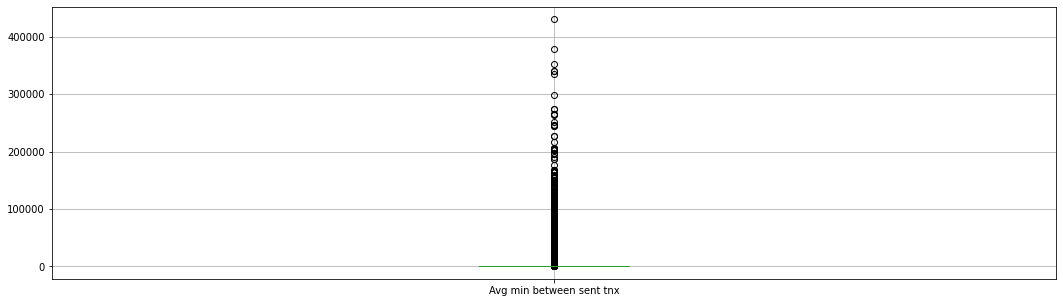

In [ ]:
# box plot using pandas 
# box plot for Avg min between sent tnx column 
data.boxplot(["Avg min between sent tnx"], figsize = (18, 5))

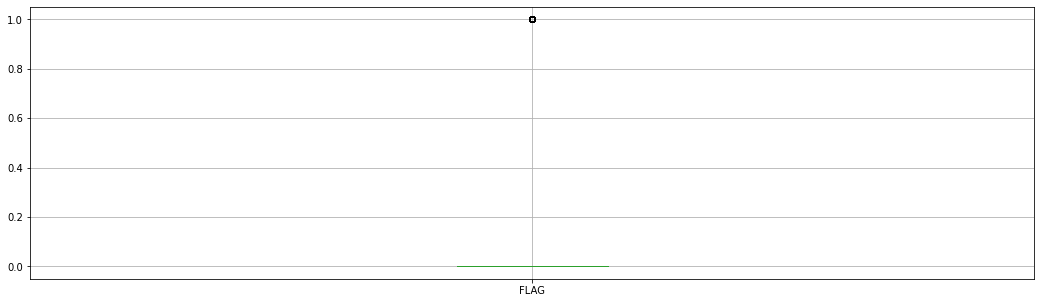

In [ ]:
# box plot using pandas 
# box plot for FLAG column 
data.boxplot(["FLAG"], figsize = (18, 5))

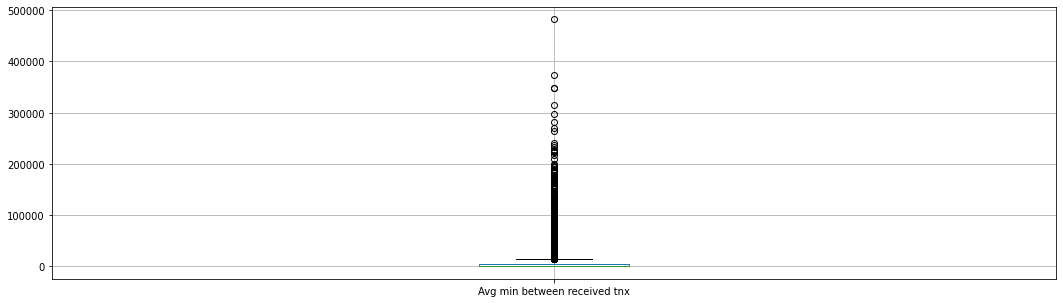

In [ ]:
# box plot using pandas 
# box plot for Avg min between received tn column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

In [ ]:
# box plot using pandas 
# box plot for Time Diff between first and last (Mins) column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee520a450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee5210490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee52174d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee5210f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee520a9d0>,
  <matplotlib.lines.Line2D at 0x7f3ee520af10>]}

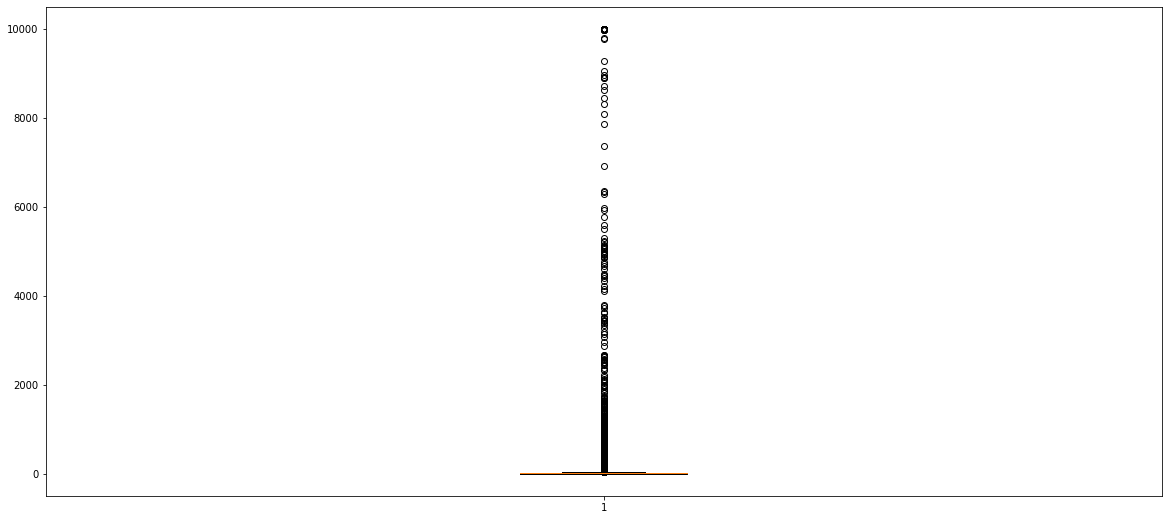

In [ ]:
# box plot using pandas 
# box plot for Sent tnx column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee51f1c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee51f8c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee517fc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee517f750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee51f81d0>,
  <matplotlib.lines.Line2D at 0x7f3ee51f8710>]}

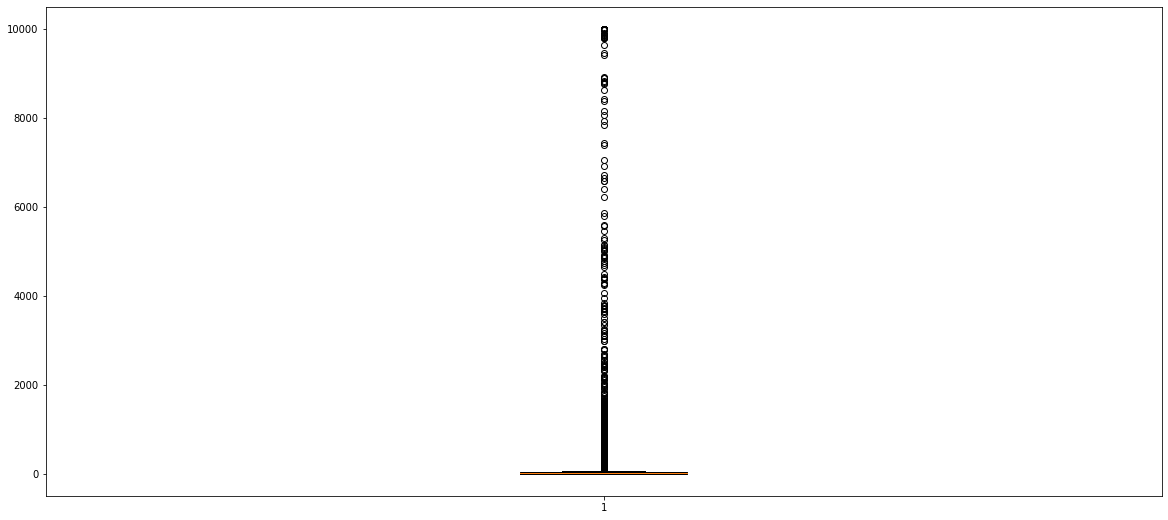

In [ ]:
# box plot using pandas 
# box plot for Received Tnx column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee5161a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee5164a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee516bad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee516b590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee5161fd0>,
  <matplotlib.lines.Line2D at 0x7f3ee5164550>]}

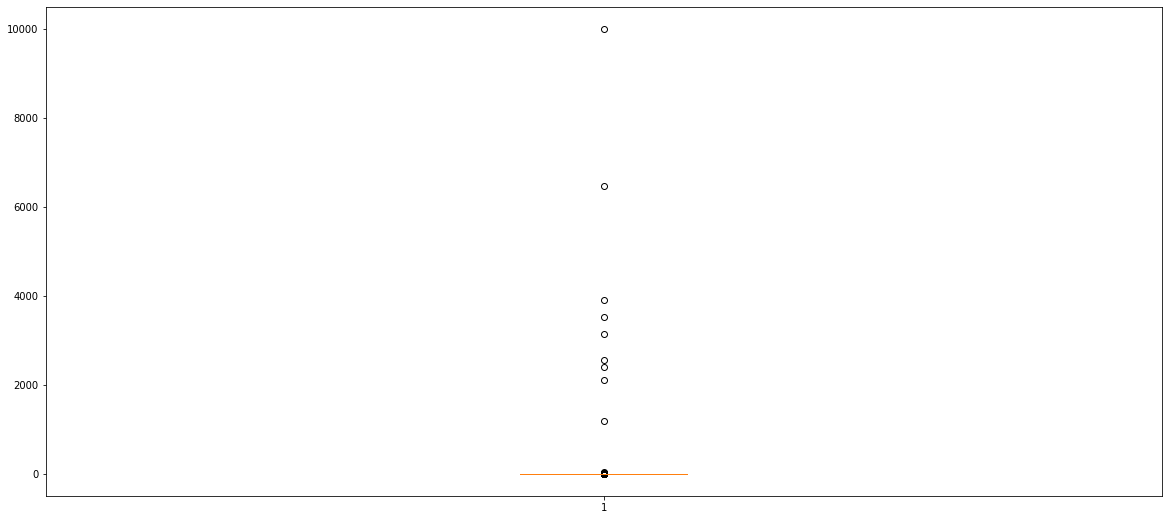

In [ ]:
# box plot using pandas 
# box plot for Number of Created Contracts column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee50cef90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee50d5fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee50e5050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee50dcad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee50d5550>,
  <matplotlib.lines.Line2D at 0x7f3ee50d5a90>]}

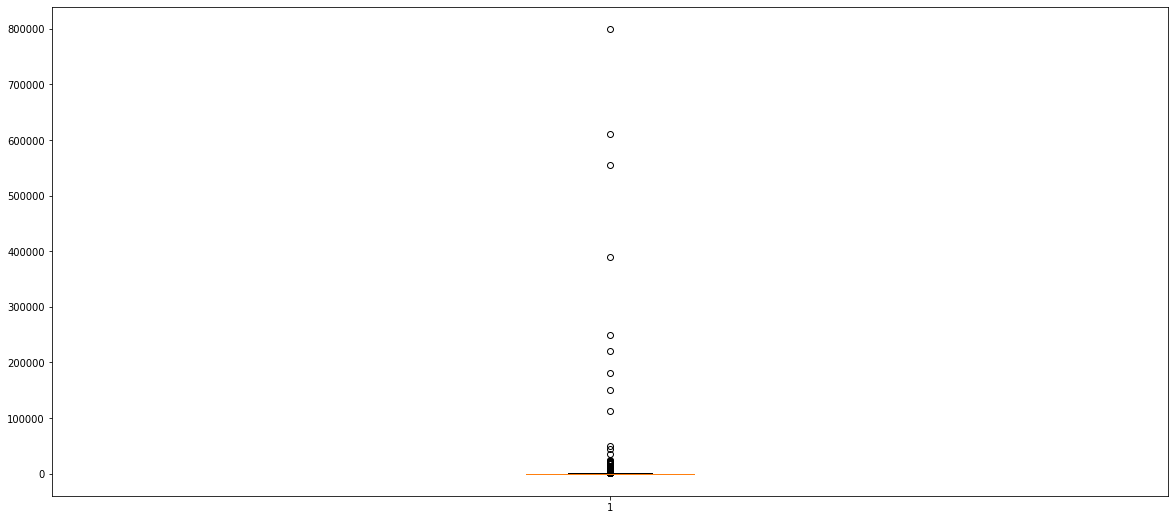

In [ ]:
# box plot using pandas 
# box plot for max value received column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee5043f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee504af50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee5051f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee5051a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee504a4d0>,
  <matplotlib.lines.Line2D at 0x7f3ee504aa10>]}

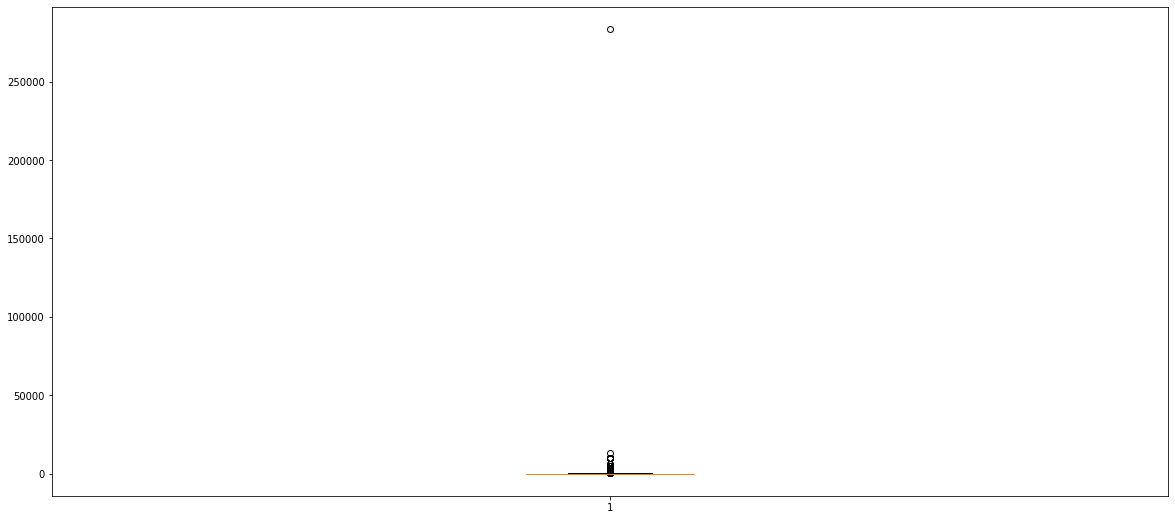

In [ ]:
# box plot using pandas 
# box plot for vg val received column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee502fd10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee5035d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4fbdd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4fbd850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee50352d0>,
  <matplotlib.lines.Line2D at 0x7f3ee5035810>]}

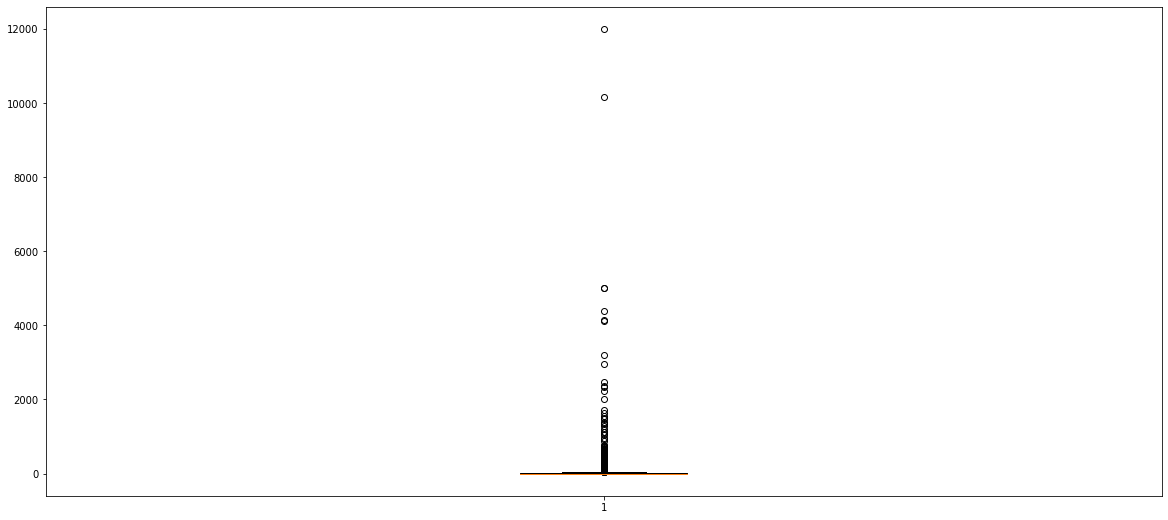

In [ ]:
# box plot using pandas 
# box plot for avg val sent column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee4fa2110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4fa8150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4fb0190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4fa8c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4fa2690>,
  <matplotlib.lines.Line2D at 0x7f3ee4fa2bd0>]}

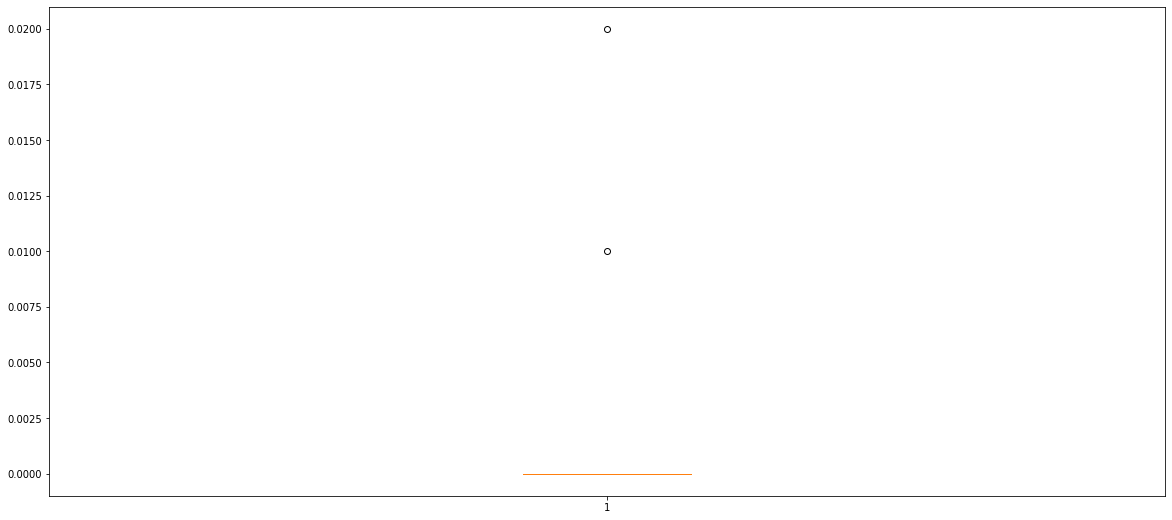

In [ ]:
# box plot using pandas 
# box plot for min value sent to contract column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ef9e8ff90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee5497a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef00dd790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef00dd290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef0202510>,
  <matplotlib.lines.Line2D at 0x7f3ee5497210>]}

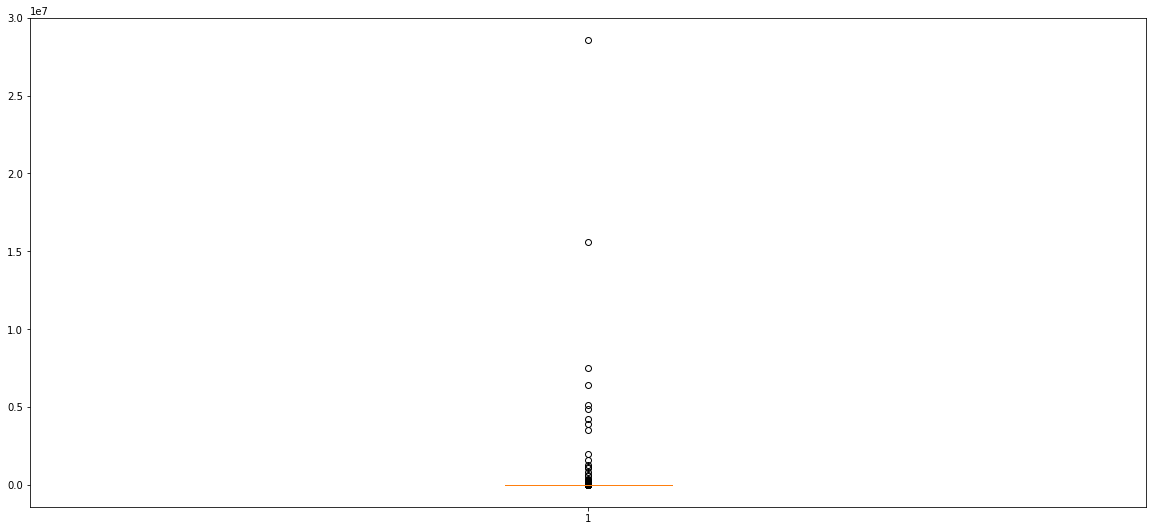

In [ ]:
# box plot using pandas 
# box plot for total Ether sent column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee530e150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee536b4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee54aec50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee54aead0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee5358c50>,
  <matplotlib.lines.Line2D at 0x7f3ee52bb550>]}

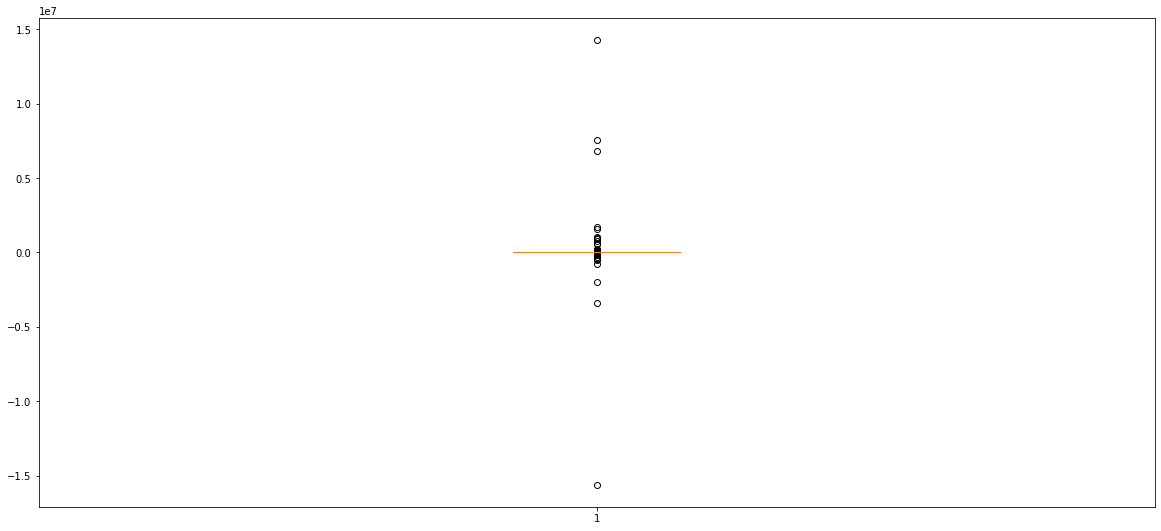

In [ ]:
# box plot using pandas 
# box plot for total ether balance column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee55a0bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4dfb6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4e02710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4e021d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4f6eb90>,
  <matplotlib.lines.Line2D at 0x7f3ee4dfb190>]}

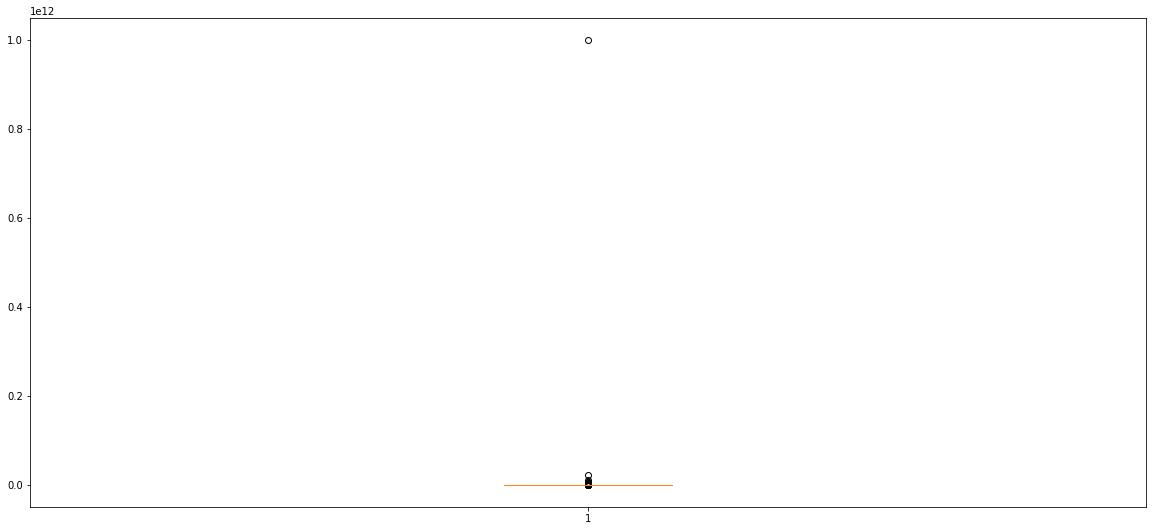

In [ ]:
# box plot using pandas 
# box plot for ERC20 total Ether received column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee4de5f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4dedf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4df4fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4df4a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4ded510>,
  <matplotlib.lines.Line2D at 0x7f3ee4deda50>]}

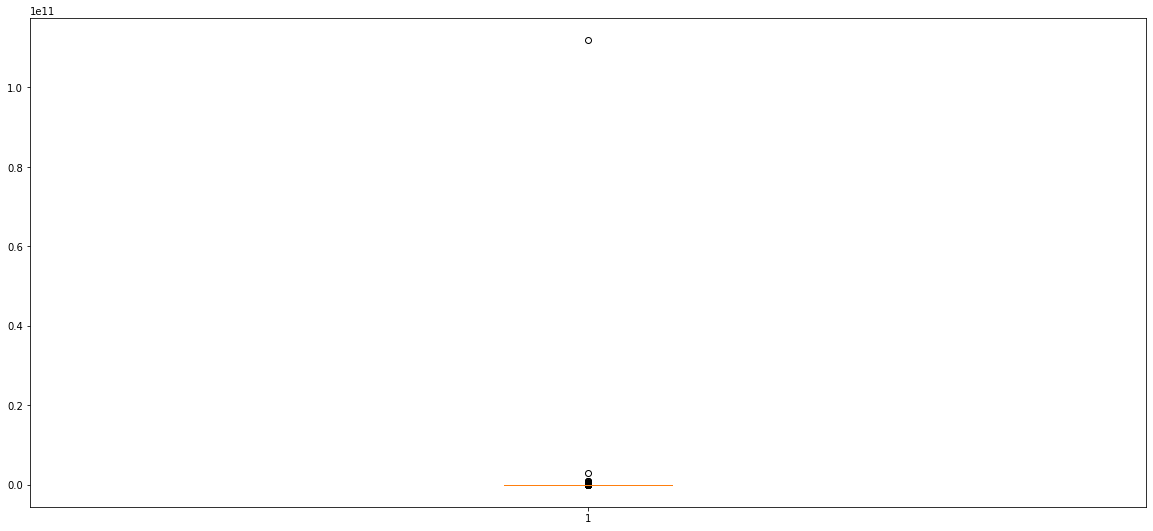

In [ ]:
# box plot using pandas 
# box plot for ERC20 total ether sent column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee4d4db10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4d53b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4d5bb90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4d5b650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4d530d0>,
  <matplotlib.lines.Line2D at 0x7f3ee4d53610>]}

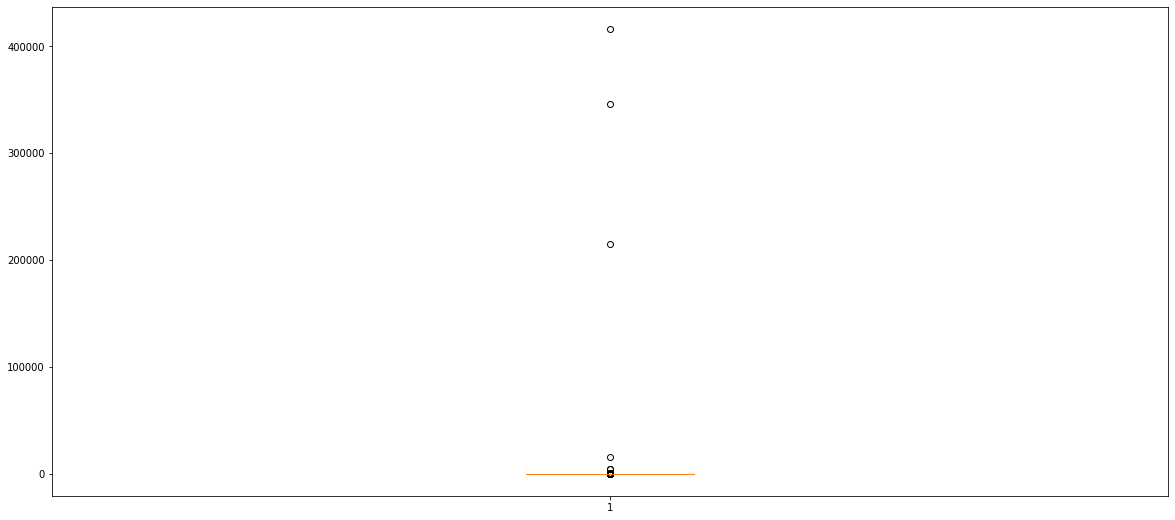

In [ ]:
# box plot using pandas 
# box plot for ERC20 total Ether sent contract column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee4d38c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4cbfc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4cc5c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4cc5750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4cbf1d0>,
  <matplotlib.lines.Line2D at 0x7f3ee4cbf710>]}

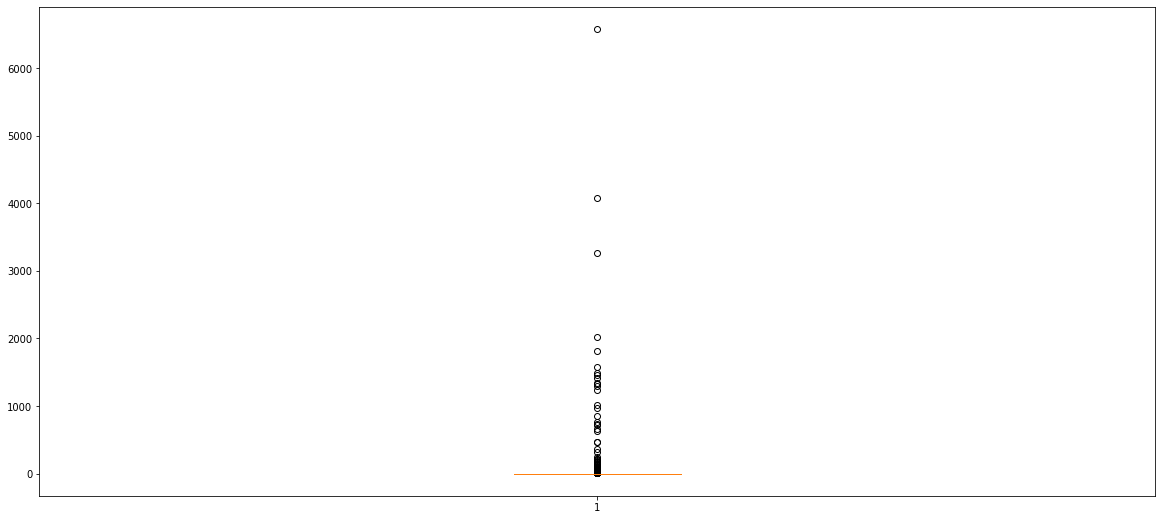

In [ ]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x7f3ee4cb61d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3ee4c3e210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ee4c44250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ee4c3ecd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3ee4cb6750>,
  <matplotlib.lines.Line2D at 0x7f3ee4cb6c90>]}

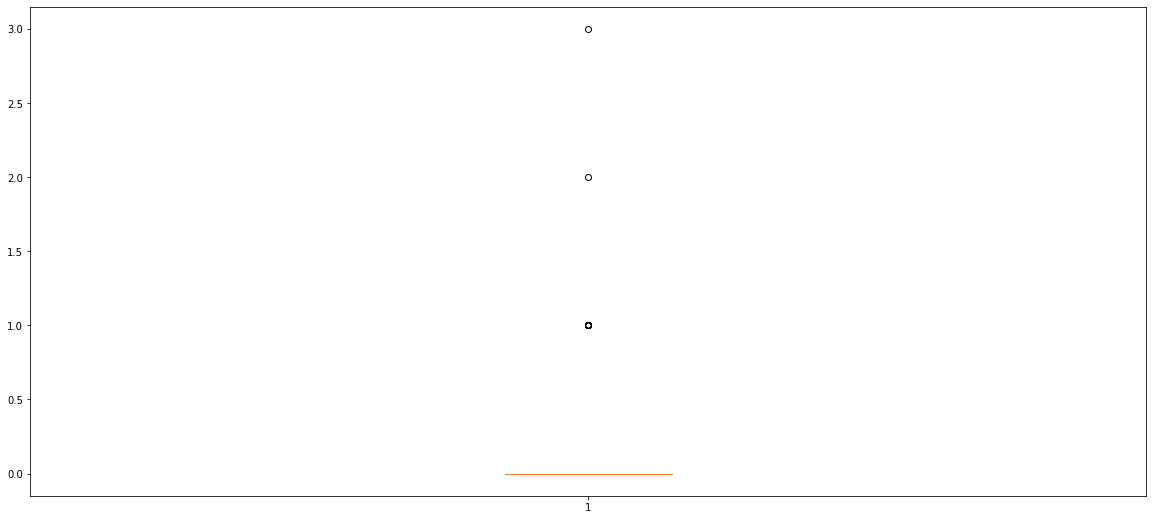

In [ ]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr.1 column 
data.boxplot(["Avg min between received tnx"], figsize = (18, 5))

KeyError: ignored

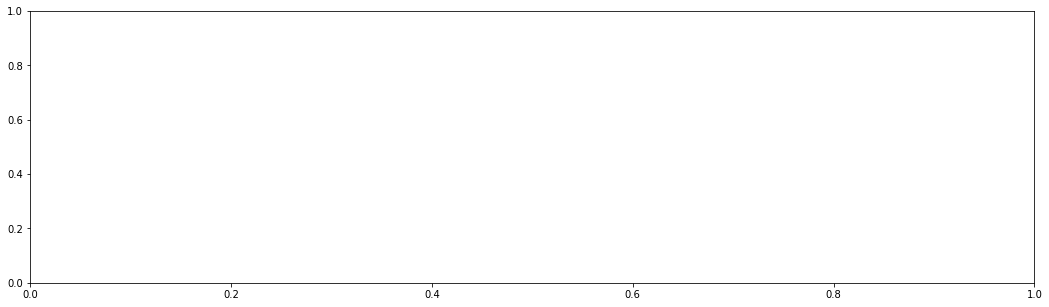

In [ ]:
# box plot using pandas 
# box plot for RC20 uniq rec token name column 
data.boxplot(["RC20 uniq rec token name"], figsize = (18, 5))

from all boxen plot we can see that the dataset is heavily skewed

# DENDROGRAM

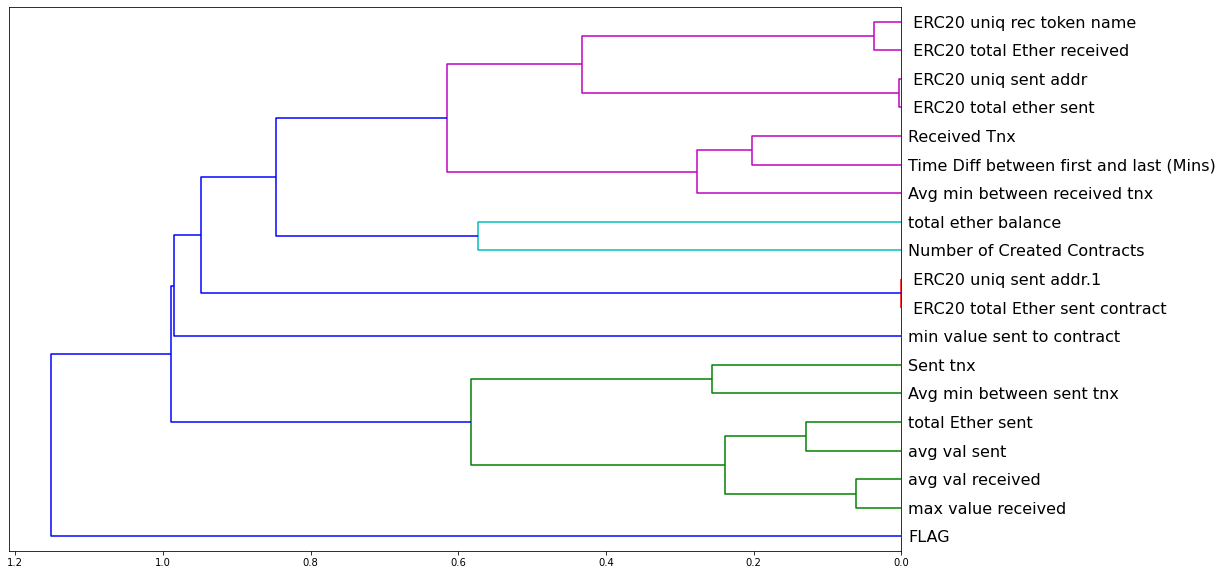

In [ ]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values


# DATA PREPROCESSING



In [ ]:
## Split the labels and the target

#check the shape 
X = data.drop("FLAG", axis = 1)
y = data["FLAG"]

X.shape, y.shape

((9841, 18), (9841,))

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

In [ ]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of train and test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 18) (7872,)
(1969, 18) (1969,)


# HANDLING SKEWNESS

In [ ]:
# import pipeline
#import standaer scalar
# import simple imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
# create pipeline
# 1.simple imputer
# 2. standard scalar 
pipeline_preprocessing = Pipeline( [
                                    ("imputer", SimpleImputer(strategy = "mean")), 
                                    ("scaler", StandardScaler())
])

In [ ]:
# fit the pipline on train data
X_train = pipeline_preprocessing.fit_transform(X_train)

# HANDLING IMBALANCE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

SMOTE - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [ ]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE 
# Instantiate
sm = SMOTE(random_state = 2)
#fit on train data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
# printthe shape of X_train After OverSampling
print("After OverSampling, the shape of train_X: {}".format(X_train_res.shape))
# printthe shape of y_train After OverSampling
print("After OverSampling, the shape of train_y: {}".format(y_train_res.shape))


After OverSampling, the shape of train_X: (12240, 18)
After OverSampling, the shape of train_y: (12240,)


# MODELING

In [ ]:
# importing necessary libraries for geting metrics of models
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error

# Function for calculating all the relevant metrics 
def print_score(model):

  res = classification_report(y_test, model.predict(X_test))
  print("Classification report \n: {}".format(res))


In [ ]:
def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)
    
                               
    
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending = False).index[:50]

    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8, max(6, len(order) * 0.25)))
    sns.boxenplot(data = feature_importance_df, x = "feature_importance", y = "column", ax= ax, order = order, palette = "viridis", orient = "h")
    ax.tick_params(axis = "x", rotation = 0)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax
    

# Logistic Regression

Classification report 
:               precision    recall  f1-score   support

           0       0.78      0.98      0.87      1542
           1       0.18      0.02      0.03       427

    accuracy                           0.77      1969
   macro avg       0.48      0.50      0.45      1969
weighted avg       0.65      0.77      0.69      1969

CPU times: user 331 ms, sys: 230 ms, total: 561 ms
Wall time: 298 ms


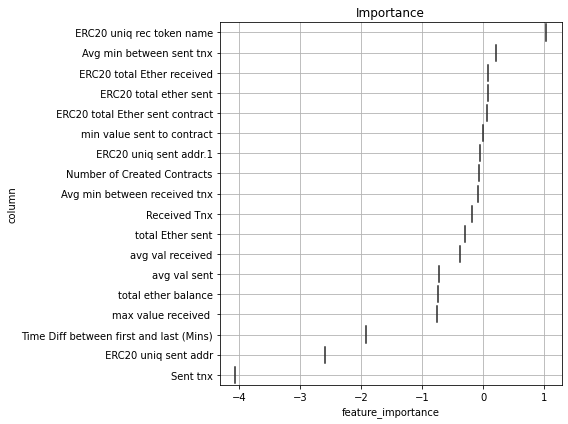

In [ ]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class = LogisticRegression()


# fitting the model on train data
log_class.fit(X_train, y_train)


# print score of the model
print_score(log_class)


# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# X_train.shape, y_train.shape

# Random Forest Classifier

Classification report 
:               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1542
           1       0.00      0.00      0.00       427

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.61      0.78      0.69      1969

CPU times: user 1.74 s, sys: 7.65 ms, total: 1.75 s
Wall time: 1.8 s


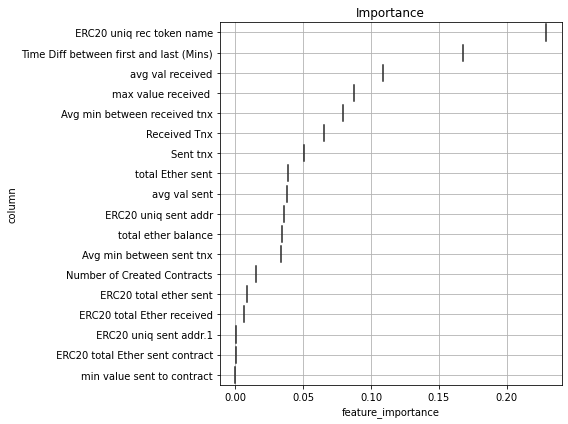

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier()


# fitting the model on train data

rf_clf.fit(X_train, y_train)

# print score of the model

print_score(rf_clf)

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)



# Decision Tree Classifier

Classification report 
:               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1542
           1       0.00      0.00      0.00       427

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.61      0.78      0.69      1969

CPU times: user 230 ms, sys: 4.22 ms, total: 235 ms
Wall time: 387 ms


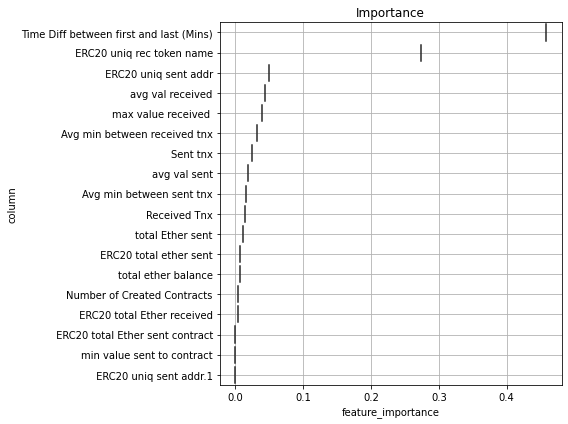

In [ ]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_clf = DecisionTreeClassifier()


# fitting the model on train data
dt_clf.fit(X_train, y_train)


# print score of the model
print_score(dt_clf)



# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_, X)



#Gradient Boosting Classifier

Classification report 
:               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1542
           1       0.22      0.00      0.01       427

    accuracy                           0.78      1969
   macro avg       0.50      0.50      0.44      1969
weighted avg       0.66      0.78      0.69      1969

CPU times: user 3.25 s, sys: 5.41 ms, total: 3.26 s
Wall time: 4.69 s


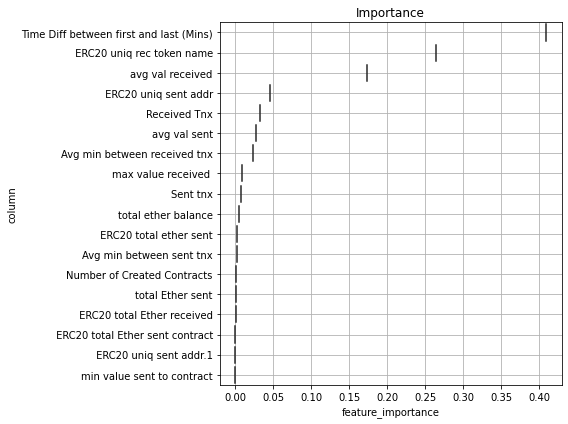

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR_clf = GradientBoostingClassifier()


# fitting the model on train data
GBR_clf.fit(X_train, y_train)


# print score of the model

print_score(GBR_clf)

# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



#XGB Classifier

CPU times: user 1.61 s, sys: 10.1 ms, total: 1.62 s
Wall time: 2.27 s


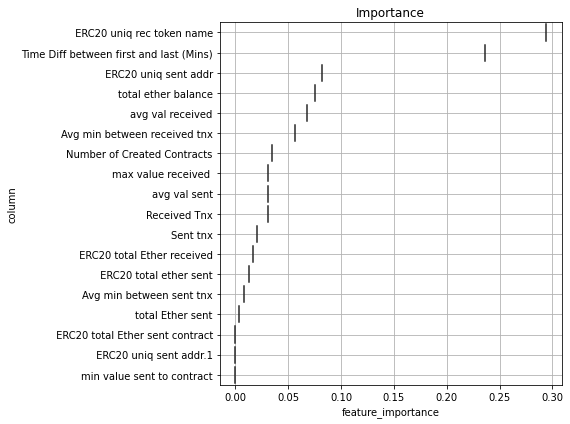

In [ ]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier


# Instantiate the model
xgb_clf = XGBClassifier()


# fitting the model on train data
xgb_clf.fit(X_train_res, y_train_res)


# # print score of the model
# print_score(xgb_clf)


# visualizing importance of features
fig, ax = visualize_importance(xgb_clf.feature_importances_, X)



# Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator = model, param_distributions= param_grid, n_iter = 10, scoring = "f1_macro", cv = 3, verbose = 2, random_state = 42)
  
  #fit on train
  random.fit(X_train, y_train)
  # print best_params_
  print(random.best_params_)
  

In [ ]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,rf_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total tim

In [ ]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeClassifier(),X_train, y_train,DTR_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=be

# woring with test data

confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

ROC AUC SCORE - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
# Prepare the test dataset i.e do all the transformation that was done on train dataset by callingthe helper function
X_test = pipeline_preprocessing.transform(X_test)

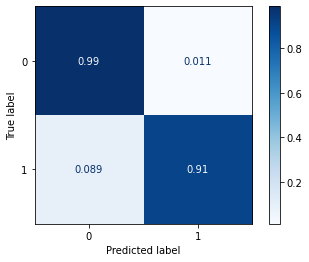

In [ ]:
# Perforn the prediction on the test dataset using random forest classifier model
test_prediction_rf = rf_clf.predict(X_test)

# display confusion matrix
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')


In [ ]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
print("Area under ROC of Model On Test Set - {}".format(roc_auc_score(y_test, test_prediction_rf)))

Area under ROC of Model On Test Set - 0.9499911912203804


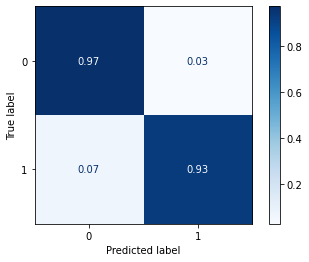

In [ ]:
# Perforn the prediction on the test dataset using decision tree classifier model
test_prediction_dt = dt_clf.predict(X_test)

# display confusion matrix
disp = metrics.plot_confusion_matrix(dt_clf, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')



In [ ]:
# print Area under ROC of Model On Test Set
print("Area under ROC of Model On Test Set - {}".format(roc_auc_score(y_test, test_prediction_dt)))

Area under ROC of Model On Test Set - 0.9499555004753703


random forest classifier is working better.

In [ ]:
# Create a dataframe with predicted result as data using best model
predicted = pd.DataFrame(test_prediction_rf)

In [ ]:
predicted

,0
0,0
1,1
2,0
3,0
4,0
...,...
1964,0
1965,0
1966,0
1967,0


# Conclusion

We did training and prediction using all the above models and selected random forest as final model as it performed well compard to other models with acurracy of 97%.

According to this model, the predicted value we got,
matches with the actual target values. We can see that in confusion matrix.

We have performed EDA, preprocessing, build different models, visualized feature importance, hyper parameter tunning and did prediction.

We also perform necessary operations to handle imbalanced and skewed nature of data. 

'ERC20 uniq rec token name' and 'time diff between first and last (min)' these two are most important feature.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.